In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
single_image = x_train[0]

In [8]:
single_image.shape

(28, 28)

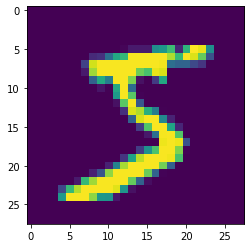

In [9]:
plt.imshow(single_image)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [14]:
y_cat_test = to_categorical(y_test, 10)

In [15]:
x_train = x_train/255
x_test = x_test/255

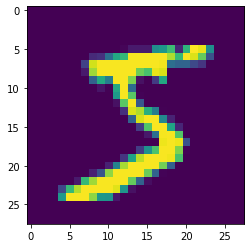

In [19]:
scaled_image = x_train[0]
plt.imshow(scaled_image)

In [20]:
x_test.shape

(10000, 28, 28)

In [21]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

In [25]:
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test),
         callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 278us/sample - loss: 0.1361 - accuracy: 0.9599 - val_loss: 0.0760 - val_accuracy: 0.9744
Epoch 2/10
60000/60000 [==============================] - 15s 254us/sample - loss: 0.0464 - accuracy: 0.9861 - val_loss: 0.0397 - val_accuracy: 0.9860
Epoch 3/10
60000/60000 [==============================] - 15s 253us/sample - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0468 - val_accuracy: 0.9859


In [26]:
metrics = pd.DataFrame(model.history.history)

In [27]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.136123,0.95995,0.075995,0.9744
1,0.046447,0.98605,0.039743,0.9860
2,0.029258,0.99085,0.046788,0.9859


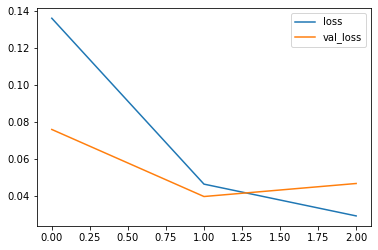

In [28]:
metrics[['loss','val_loss']].plot()

In [30]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.04678798151315423, 0.9859]

In [31]:
from sklearn.metrics import classification_report

In [32]:
y_pred = model.predict_classes(x_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.97      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

